In [1]:
sample = u"I can't imagine spending $3000 for a single bedroom apartment in N.Y.C."
#LOAD THE ACTUAL DATA
import os
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
#from wordcloud import WordCloud
PATH = 'C:\\Users\\LucBl\\OneDrive\\Bureaublad\\Uni Master\\IRTM\\Assignment\\IRTM-F1TeamRadio\\F1 Teamradio\\'
#PATH = 'C:\\Users\\dbn\\Desktop\\IRTM-F1TeamRadio\\F1 Teamradio\\'
filelist = os.listdir(PATH + 'Transcripts')
data = pd.read_excel(PATH+'Transcripts\\'+ filelist[0])
racename = filelist[0].replace('2017-','')
racename = racename.replace('-Race.xlsx','')
Track = [racename]*len(data.Driver)
data['Track'] = Track
for i in range(1,19):
    df = pd.read_excel(PATH+'Transcripts\\'+ filelist[i])
    racename = filelist[i].replace('2017-','')
    racename = racename.replace('-Race.xlsx','')
    Track = [racename]*len(df.Driver)
    df['Track'] = Track
    #print(df.columns.values)
    #print(filelist[i])
    data = pd.concat([data,df])
data = data.dropna(axis=0,how='any')
data.index = range(0,len(data.Driver))

filelistR = os.listdir(PATH + 'Results')
dataR = pd.read_excel(PATH+'Results\\'+ filelistR[0])
racenameR = filelistR[0].replace('2017-','')
racenameR = racenameR.replace('-Results.xlsx','')
TrackR = [racenameR]*len(dataR.DRIVER)
dataR['Track'] = TrackR
for i in range(1,19):
    df = pd.read_excel(PATH+'Results\\'+ filelistR[i])
    racenameR = filelistR[i].replace('2017-','')
    racenameR = racenameR.replace('-Results.xlsx','')
    TrackR = [racenameR]*len(df.DRIVER)
    df['Track'] = TrackR
    #print(df.columns.values)
    #print(filelist[i])
    dataR = pd.concat([dataR,df])

To = [None]*len(data.Driver)
From = [None]*len(data.Driver)
data['To'] = pd.Series(To,index = data.index)
data['From'] = pd.Series(From,index = data.index)
for i in range(0,len(data.Driver)):
    if 'To' in data.Driver[i]:
        data.To[i] = data.Driver[i].replace('To\xa0','')
        data.To[i] = data.To[i].replace('To ','')
        data.To[i] = data.To[i].replace('To','')
    elif 'From' in data.Driver[i]:
        data.From[i] = data.Driver[i].replace('From\xa0','')
        data.From[i] = data.From[i].replace('From ','')
        data.From[i] = data.From[i].replace('From','')
    else:
        data.To[i] = data.Driver[i]
        data.From[i] = data.Driver[i]
messages = list(data.Message)
print(messages[0:10])
print(len(messages))


['It’s quite windy out there.', 'To Hamilton: Still headwind turn two, it may have rotated compared to yesterday so more of a tailwind turn eight. Still predominantly the same direction, though.', 'Grosjean: Thanks for waiting, I’ve finished my drink.', 'No problem, that was a big drink.', 'Is the temperature still dropping?', 'Yeah it should be dropping. The sun’s just disappearing behind the grandstand. It should be down.', 'Fernando tyre info: prime [soft] runners are Wehrlein, Ericsson and Hartley, everyone else on option [ultra-soft].', 'The fumes have been pretty strong.', 'Yeah that’s Ricciardo behind you quite smoky.', 'Something flew out of my car, hit me in the head on top of the car, don’t know what it was.']
2977


In [2]:
import string
from collections import Counter

allText = " ".join([str(data.Message[j]).lower().translate(str.maketrans('','',string.punctuation)) for j in range(0,len(data.Message))])
allwords = Counter()
allwords.update(allText.split())

DriverFromDictionary = pd.DataFrame(columns = data.From.unique())
DriverFromDictionary['All'] = pd.Series(dict(allwords.most_common()))
for i in range(0,len(data.From.unique())):
    DriverName = data.From.unique()[i]
    if DriverName != None and DriverName != '':
        dataFromDriver = data[data.From == DriverName]
        dataFromDriver.index = range(0,len(dataFromDriver.Driver))
        dataFromDriver.Message = [str(dataFromDriver.Message[j]).lower().translate(str.maketrans('','',string.punctuation)) for j in range(0,len(dataFromDriver.Message))]
        
        TotalText = " ".join(dataFromDriver.Message)
        words = Counter()
        words.update(TotalText.split())
        DriverFromDictionary[DriverName] = pd.Series(dict(words.most_common()))
    else:
        continue
DriverFromDictionary = DriverFromDictionary.fillna(0)
DriverToDictionary = pd.DataFrame(columns = data.To.unique())
DriverToDictionary['All'] = pd.Series(dict(allwords.most_common()))
for i in range(0,len(data.To.unique())):
    DriverName = data.To.unique()[i]
    if DriverName != None and DriverName != '':
        dataToDriver = data[data.To == DriverName]
        dataToDriver.index = range(0,len(dataToDriver.Driver))
        dataToDriver.Message = [str(dataToDriver.Message[j]).lower().translate(str.maketrans('','',string.punctuation)) for j in range(0,len(dataToDriver.Message))]
        
        TotalText = " ".join(dataToDriver.Message)
        words = Counter()
        words.update(TotalText.split())
        DriverToDictionary[DriverName] = pd.Series(dict(words.most_common()))
    else:
        continue
DriverToDictionary = DriverToDictionary.fillna(0)        

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [3]:
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en')
doc = nlp(sample)
docs =  []
for i in range(0,len(messages)):
    docs.append(nlp(messages[i]))

TypeError: object of type 'int' has no len()

In [ ]:
# Print out tokens
print(docs[0:10])

In [ ]:
# Store tokens as list, print out
toks = [None]*len(docs)
for i in range(0,len(docs)):
    tokens = [token for token in docs[i]]
    toks[i] = tokens
    #print(tokens)


In [ ]:
for word in doc:
    if word.is_stop == True:
        print(word)


In [ ]:
#for i in range(0,len(docs)):
#    for token in docs[i]:
#        print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#              token.shape_, token.is_alpha, token.is_stop)

In [4]:
for i in range(571,572): 
    displacy.render(docs[i], style='dep', jupyter=True, options={'distance': 70})

In [5]:
# Print out named entities
for i in range(0,len(docs)):
    for ent in docs[i].ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)


Hamilton 3 11 PERSON
two 33 36 CARDINAL
yesterday 70 79 DATE
eight 107 112 DATE
Wehrlein 45 53 PERSON
Ericsson 55 63 PERSON
Hartley 68 75 ORG
Ricciardo 12 21 PERSON
Hulkenberg 0 10 PERSON
Nico 3 7 PERSON
first 26 31 ORDINAL
Understood 0 10 ORG
Charlie 12 19 PERSON
Lance 9 14 ORG
Charlie 21 28 PERSON
Hulkenberg 11 21 GPE
Max 13 16 PERSON
Understood 0 10 ORG
Kimi 44 48 ORG
Charlie 8 15 PERSON
Hulkenberg 0 10 PERSON
five 22 26 CARDINAL
second 27 33 ORDINAL
two 11 14 CARDINAL
mid two 16 23 DATE
Lance 42 47 ORG
Kimi 58 62 ORG
11 22 24 CARDINAL
two 16 19 CARDINAL
Massa 26 31 ORG
Lewis 4 9 PERSON
nine in second gear 33 52 TIME
Valtteri 90 98 ORG
42.6 105 109 CARDINAL
Understood 0 10 ORG
two 34 37 CARDINAL
three 41 46 CARDINAL
two 107 110 CARDINAL
Verstappen 0 10 ORG
nine 5 9 CARDINAL
Understood 0 10 ORG
Daniel 24 30 PERSON
19 25 27 CARDINAL
P0 246 248 GPE
Daniel 0 6 ORG
One hundred and one 0 19 CARDINAL
Fernando 35 43 PERSON
Ricciardo 49 58 PERSON
four to five 19 31 CARDINAL
four or five 73 8

Stroll 39 45 ORG
Vettel 69 75 ORG
Four 24 28 CARDINAL
FOM 28 31 ORG
Hahaha 0 6 NORP
FOM 26 29 ORG
18 years old 89 101 DATE
P4 4 6 ORG
P4 8 10 ORG
ten seconds 151 162 TIME
ten seconds 164 175 TIME
ten seconds 220 231 TIME
Valtteri 60 68 ORG
Six 0 3 CARDINAL
seven 5 10 CARDINAL
11 57 59 CARDINAL
five 61 65 CARDINAL
six 67 70 DATE
seven 72 77 CARDINAL
Thirteen 79 87 CARDINAL
Esteban 10 17 LOC
13 14 16 CARDINAL
P9 32 34 GPE
five 46 50 CARDINAL
P0 35 37 GPE
P0 17 19 GPE
Seven minutes to formation lap 0 30 TIME
one changing between 10 and 20kph 52 85 QUANTITY
Kimi 12 16 ORG
a quarter 45 54 DATE
a quarter 91 100 DATE
Lewis 12 17 PERSON
Lewis 10 15 PERSON
two 93 96 CARDINAL
Bite 104 108 PERSON
30 seconds 120 130 TIME
and then ten seconds 147 167 TIME
first 235 240 ORDINAL
Ericsson 0 8 ORG
Ocon 18 22 ORG
Verstappen 12 22 PRODUCT
0.6 35 38 CARDINAL
Danny 0 5 ORG
Max 17 20 PERSON
HPP 0 3 ORG
eight to two 4 16 DATE
Max 8 11 PERSON
0.5 53 56 CARDINAL
Vettel 3 9 ORG
Bottas 0 6 ORG
36.7s 52 57 CARDIN

Hamilton 59 67 PERSON
second 68 74 ORDINAL
Bottas 76 82 ORG
third 83 88 ORDINAL
Ricciardo 105 114 GPE
Massa 116 121 PERSON
Perez 123 128 GPE
Grosjean 130 138 PERSON
Hulkenberg 140 150 PERSON
Ocon 155 159 GPE
the Safety Car 67 81 FAC
today 17 22 DATE
Vettel 40 46 ORG
Hamilton 48 56 PERSON
Bottas 58 64 GPE
Raikkonen 66 75 GPE
Ricciardo 77 86 GPE
Massa 88 93 PERSON
Perez 95 100 GPE
Grosjean 102 110 GPE
Nico 112 116 GPE
Esteban 118 125 ORG
Wehrlein 127 135 PERSON
Kvyat 137 142 PERSON
P0 176 178 GPE
Andrea 33 39 PERSON
Nico 0 4 GPE
Wehrlein 58 66 PERSON
three degrees 18 31 QUANTITY
Nico 3 7 PERSON
Nico 52 56 GPE
SOC 37 40 ORG
Yep Fernando 0 12 PERSON
two 76 79 CARDINAL
four 98 102 CARDINAL
1.4 13 16 CARDINAL
Grojean 24 31 GPE
six 5 8 CARDINAL
eight 18 23 CARDINAL
Max 12 15 PERSON
Fail 17 21 PERSON
one 22 25 CARDINAL
Fail 0 4 ORG
one 5 8 CARDINAL
One PERSON
Grosjean 45 53 PERSON
Ricciardo 7 16 PERSON
three 31 36 CARDINAL
three 15 20 CARDINAL
another two seconds 5 24 TIME
Lewis 12 17 PERSON
O

between turn seven and eight 93 121 DATE
11 40 42 CARDINAL
three 83 88 CARDINAL
Ocon 43 47 ORG
Vettel 58 64 ORG
Esteban 0 7 ORG
P3 11 13 GPE
27.1 15 19 CARDINAL
0.4s 21 25 CARDINAL
Ocon 32 36 ORG
Hamilton 0 8 PERSON
26.3 24 28 CARDINAL
Marcus 3 9 PERSON
28 30 32 CARDINAL
zero 67 71 CARDINAL
Kimi 37 41 ORG
Roger 0 5 PERSON
EB 89 91 GPE
Gap 0 3 PERSON
Valtteri 7 15 GPE
2.9 19 22 CARDINAL
Valtteri 24 32 ORG
25.4 38 42 CARDINAL
Lewis 44 49 PERSON
two 63 66 CARDINAL
Bottas 0 6 ORG
Hamilton 0 8 PERSON
25.6 18 22 CARDINAL
Bottas 25.3 24 35 DATE
Vettel 4 10 ORG
Fernando 14 22 PRODUCT
Ocon 164 168 ORG
second 191 197 ORDINAL
Ocon P4 205 212 PERSON
nine seconds 224 236 TIME
Driver 0 6 GPE
two 21 24 CARDINAL
Driver 0 6 GPE
four six 21 29 DATE
Ferrari 17 24 PERSON
Copy 0 4 ORG
Carlos 36 42 PERSON
Sainz 0 5 ORG
Sainz 0 5 ORG
nine 35 39 CARDINAL
Hamilton 36 44 PERSON
Max 57 60 PERSON
Nico 3 7 PERSON
four 44 48 CARDINAL
Degner 1 77 85 DATE
Max 18 21 PERSON
one 57 60 CARDINAL
Racing Palmer 0 13 PERSON


In [7]:
for i in range(0:10)
    displacy.render(docs[i], style='ent', jupyter=True)

SyntaxError: invalid syntax (<ipython-input-7-bfe700f2d06e>, line 1)

In [8]:
docs[0].similarity(docs[1])

0.7169405593093872

In [9]:
import difflib
SimilarityMatrix = pd.DataFrame(index=DriverFromDictionary.columns,columns = DriverFromDictionary.columns)
#SimilarityMatrix = SimilarityMatrix.fillna(0)
for driver1 in DriverFromDictionary.columns:
    for driver2 in DriverFromDictionary.columns:
        sm =difflib.SequenceMatcher(None,list(DriverFromDictionary[driver1]),list(DriverFromDictionary[driver2]))
        SimilarityMatrix[driver1][driver2] = float(sm.ratio())
        if driver1 == driver2:
            SimilarityMatrix[driver1][driver2] = 0
        
SimilarityMatrix = SimilarityMatrix.astype('float64')
    
print(SimilarityMatrix)

                   Lewis Hamilton       NaN  Romain Grosjean  Kimi Raikkonen  \
Lewis Hamilton           0.000000  0.005920         0.018605        0.014799   
NaN                      0.005920  0.000000         0.001268        0.005920   
Romain Grosjean          0.030021  0.001268         0.000000        0.018182   
Kimi Raikkonen           0.024947  0.005920         0.016490        0.000000   
Sergio Perez             0.032135  0.054123         0.033404        0.011839   
Nico Hulkenberg          0.035941  0.042706         0.032558        0.015222   
Kevin Magnussen          0.043129  0.054123         0.027061        0.046512   
Esteban Ocon             0.036364  0.004651         0.038901        0.042706   
Stoffel Vandoorne        0.024524  0.026638         0.035941        0.053277   
Max Verstappen           0.025793  0.010994         0.040592        0.018605   
Lance Stroll             0.021142  0.054123         0.041438        0.036786   
Fernando Alonso          0.022410  0.004

[25 rows x 25 columns]


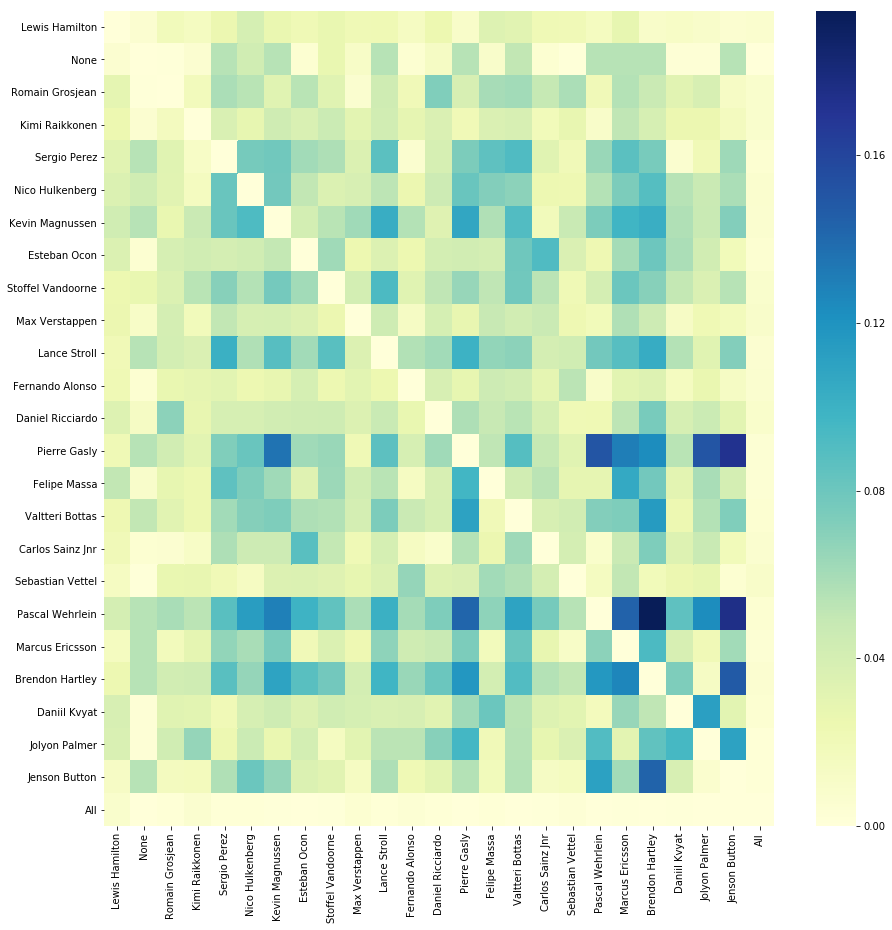

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))   
ax = sns.heatmap(SimilarityMatrix, cmap="YlGnBu")
fig = ax.get_figure()
fig.savefig("heatmap.png")

###### 

2977
2977
2977
0       0.0000
1       0.0000
2       0.4404
3      -0.5994
4       0.0000
5       0.2960
6       0.0000
7       0.7506
8       0.2960
9       0.2023
10     -0.2732
11      0.0000
12      0.4466
13      0.0000
14      0.6249
15      0.0000
16      0.0000
17      0.0000
18      0.0000
19      0.0000
20      0.3612
21      0.0000
22     -0.2732
23      0.0000
24      0.2023
25     -0.3716
26      0.0000
27      0.1226
28      0.0000
29      0.0000
         ...  
2947    0.8878
2948    0.2732
2949    0.8957
2950    0.8020
2951    0.5106
2952    0.2732
2953    0.4404
2954    0.7090
2955    0.6901
2956    0.8020
2957    0.9006
2958   -0.3818
2959    0.9182
2960    0.9631
2961    0.8671
2962    0.4588
2963    0.4019
2964    0.0000
2965    0.0000
2966    0.7019
2967    0.0772
2968    0.2960
2969    0.2960
2970    0.2212
2971    0.4466
2972   -0.4939
2973    0.4404
2974    0.8349
2975    0.0000
2976    0.0736
Name: compound, Length: 2977, dtype: float64


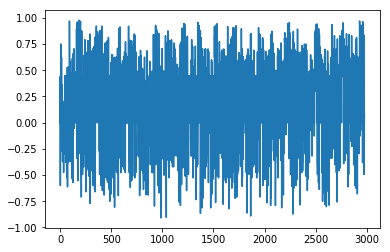

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentences = data.Message
pos = []
neg = []
comp = []
for sentence in sentences:
    #print(sentence)
    ss = sid.polarity_scores(str(sentence))
    pos.append(ss['pos'])
    neg.append(ss['neg'])
    comp.append(ss['compound'])
    #print()
#print(comp)
print(len(comp))
print(len(neg))
print(len(sentences))
data['compound'] = comp

print(data['compound'])

#plt.plot(comp)

In [69]:
Abu = data[data.Track == 'AbuDhabi']
for i in range(0,len(Abu['Lap*'].unique())):
    lapName = Abu['Lap*'].unique()[i]
    for j in range(0,len(Abu['Lap*'].unique())):
        comps = Abu.compound[Abu['Lap*'] == Abu['Lap*'].unique()[j]]
        meanComp[j] = mean(comps)

TypeError: 'method' object is not subscriptable